<center><h4> Predicting Diagnosis of Breast Cancer Mass with Random Forest, Multilayer Perceptron, and Support Vector Machine </h4></center>
<center><h6> author: Neil Kutty </h6></center>

This project attempts to predict if a breast cancer mass is Malignant or Benign based on 30 features of the cell nuclei as gathered using a fine needle aspirate method. We have a 569 record dataset that is used for the training, test, and cross validation steps. 

We include all available predictor versions in our model <b>(<i>Mean, Standard Error, and Worst</i>)</b> for the 10 core predictors (<b>Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Concave Points, Symmetry, and Fractal Dimension</b>).

<b>Findings</b>: Including all available predictor versions in our model (Mean, Standard Error, and Worst) for the 10 core predictors (Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Concave Points, Symmetry, and Fractal Dimension) we achieve a <b>~99.42% accuracy with Multilayer Perceptron Classification with a cross-validation score of ~95%</b> (the same cv score as our Random Forest, but a much higher testing accuracy).  Our Random Forest Classifier <b>accuracy of ~98%</b> and a <b>cross-validation score of ~95%</b>.   SVM achieves the lowest accuracy of ~96%. 

acknowledgments: Thanks to Buddhini W. for a well-articulated treatment of this dataset-  [1st Place Kaggle Submission - author: Buddhini W.](https://www.kaggle.com/buddhiniw/d/uciml/breast-cancer-wisconsin-data/breast-cancer-prediction)


<h6> Dataset Description </h6>
<p> source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29<br>
source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data<br>
1st place submission: https://www.kaggle.com/buddhiniw/d/uciml/breast-cancer-wisconsin-data/breast-cancer-prediction<br>

Features are computed from a digitized image of a fine needle aspirate (FNA) 
of a breast mass. They describe characteristics of the cell nuclei present 
in the image. n the 3-dimensional space is that described in: 
[K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of 
Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: 
    ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: 
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)<br> 
b) texture (standard deviation of gray-scale values)<br> 
c) perimeter<br> 
d) area<br> 
e) smoothness (local variation in radius lengths)<br> 
f) compactness (perimeter^2 / area - 1.0)<br> 
g) concavity (severity of concave portions of the contour)<br> 
h) concave points (number of concave portions of the contour)<br> 
i) symmetry<br> 
j) fractal dimension ("coastline approximation" - 1)<br>

The mean, standard error and "worst" or largest (mean of the three largest values)
of these features were computed for each image, resulting in 30 features.
For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as s
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


/Users/NNK/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#%% Get and Clean Data

#Read data as pandas dataframe
d = pd.read_csv('diagnostic.csv')


df = d.drop('Unnamed: 32', axis=1)

#if using diagnosis as categorical
df.diagnosis = df.diagnosis.astype('category')

#Create references to subset predictor and outcome variables
x = list(df.drop('diagnosis',axis=1).drop('id',axis=1))
y ='diagnosis'

# -- Feature Normalization / Scaling -----------------------------------------
#  Normalize features for SVM and MLPClassifier
#-----------------------------------------------------------------------------
df2 = df[x]
df_norm = (df2 - df2.mean()) / (df2.max() - df2.min())
df_norm = pd.concat([df_norm, df[y]], axis=1)
#-----------------------------------------------------------------------------


#show first 10 rows
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


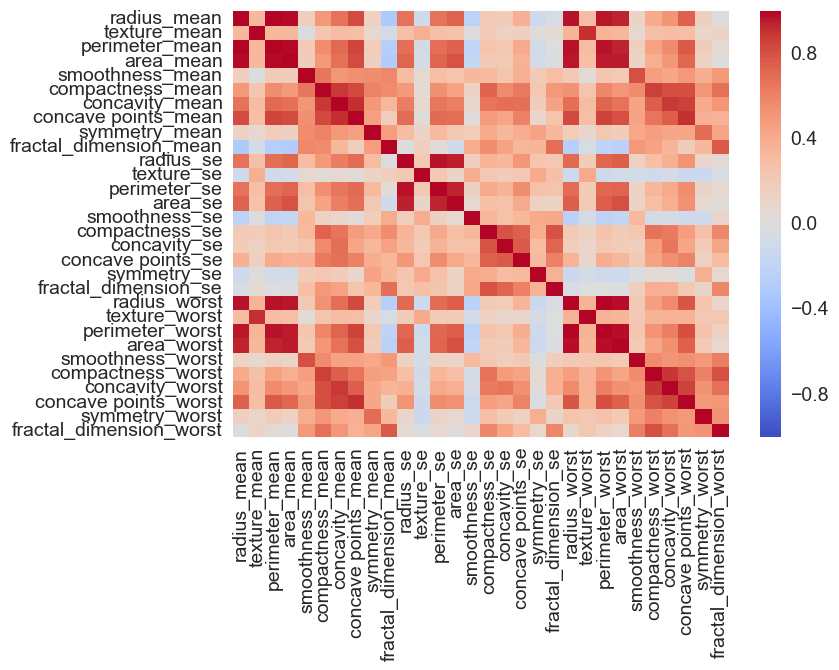

In [3]:
#Explore correlations
plt.rcParams['figure.figsize']=(12,8)
s.set(font_scale=1.4)
s.heatmap(df.drop('diagnosis', axis=1).drop('id',axis=1).corr(), cmap='coolwarm')



<h4> Mean versions of the 10 Core Predictors </h4><br>
The below boxplots are of the "mean" value for the 10 core features in the dataset.  These are ranked as the most important features in the model we fit (see Feature Importances below) in terms of classifying the breast cancer mass as Malignant (M) or Benign (B). 

The charts reveal a tendency for the average value of a feature to be generally higher for malignant diagnoses vs. the benign class. This is true for every feature except for <b> Fractal Dimension Mean</b> which shows a flat difference between M and B diagnoses for the mean value of the feature.  <b>Radius Mean</b> on the other hand shows a more distinct distribution for M vs. B diagnoses, as is subsequently found to be the most important feature according to our fitted Random Forest model further below (see Feature Importances cell[9]&[10] below).  

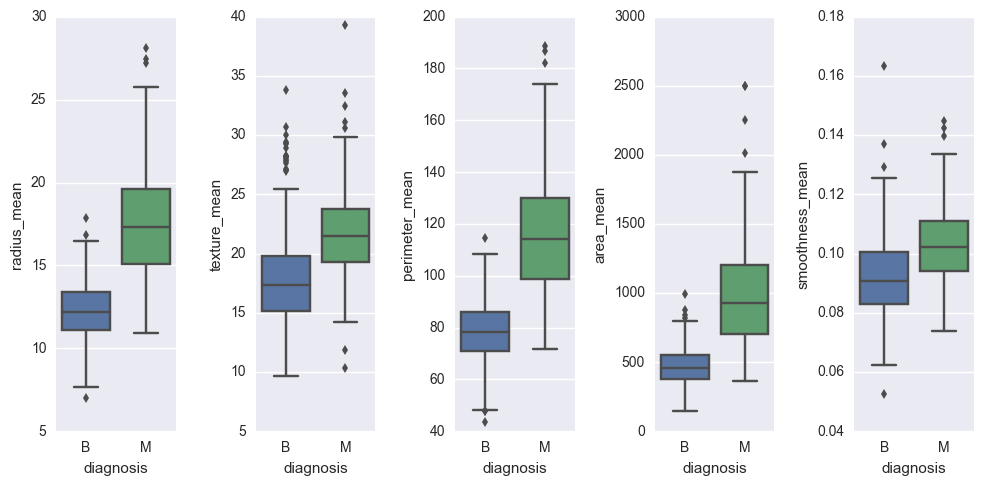

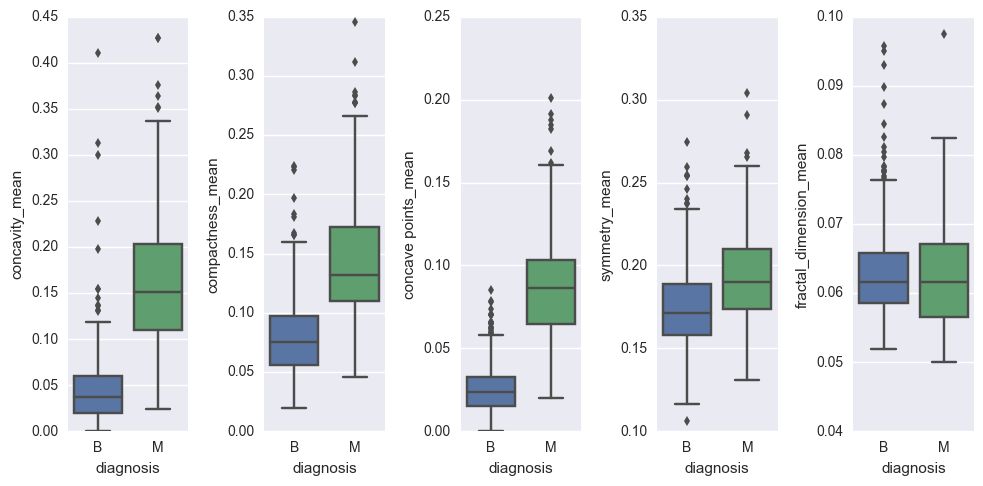

In [3]:
plt.rcParams['figure.figsize']=(10,5)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='radius_mean',data=df, ax=ax1)
s.boxplot('diagnosis',y='texture_mean',data=df, ax=ax2)
s.boxplot('diagnosis',y='perimeter_mean',data=df, ax=ax3)
s.boxplot('diagnosis',y='area_mean',data=df, ax=ax4)
s.boxplot('diagnosis',y='smoothness_mean',data=df, ax=ax5)
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='compactness_mean',data=df, ax=ax2)
s.boxplot('diagnosis',y='concavity_mean',data=df, ax=ax1)
s.boxplot('diagnosis',y='concave points_mean',data=df, ax=ax3)
s.boxplot('diagnosis',y='symmetry_mean',data=df, ax=ax4)
s.boxplot('diagnosis',y='fractal_dimension_mean',data=df, ax=ax5)    
f.tight_layout()

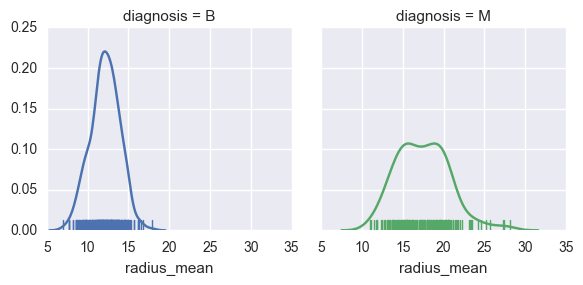

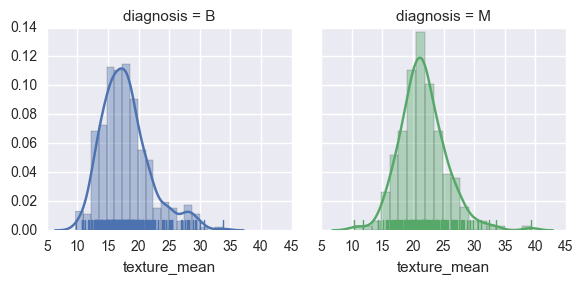

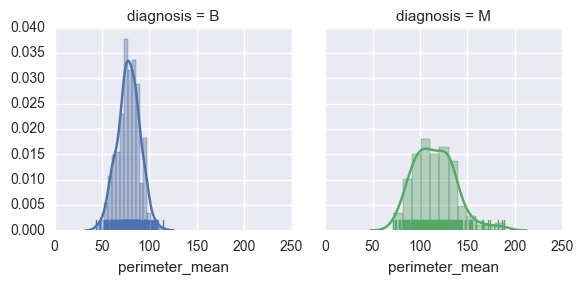

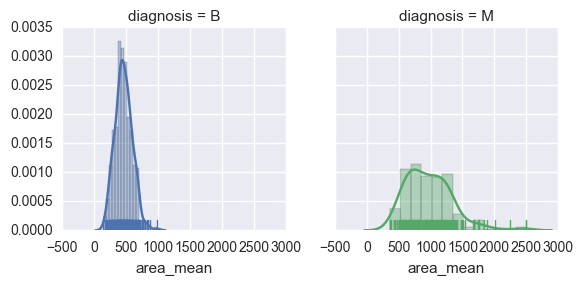

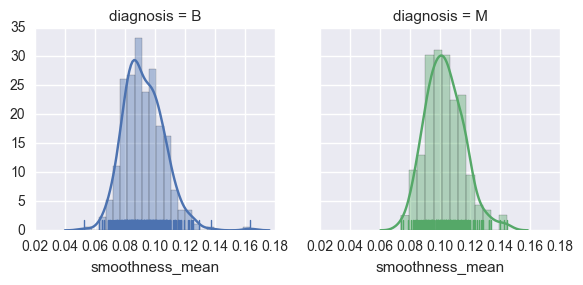

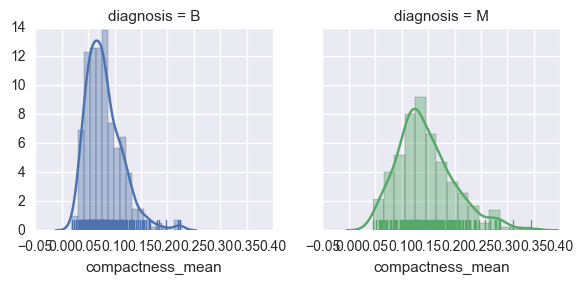

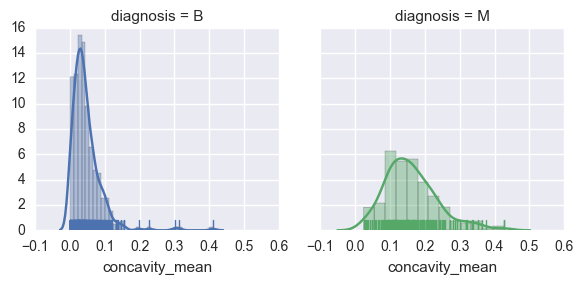

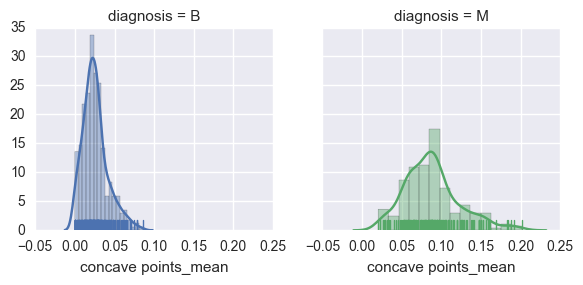

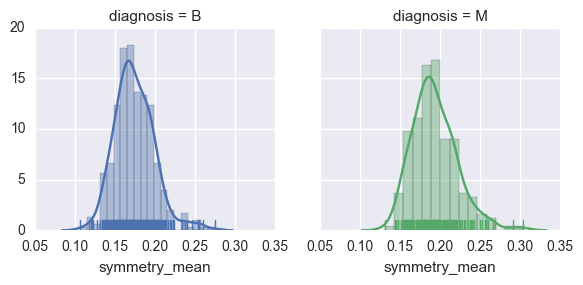

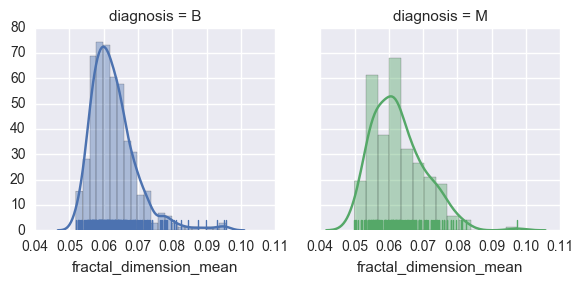

In [5]:


g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "radius_mean", hist=False, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "texture_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "perimeter_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "area_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "smoothness_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "compactness_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "concavity_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "concave points_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "symmetry_mean", hist=True, rug=True)

g = s.FacetGrid(df, col='diagnosis', hue='diagnosis')
g.map(s.distplot, "fractal_dimension_mean", hist=True, rug=True)

<h4> Standard Error versions of the 10 Core Predictors </h4><br>
Visualizing the <i>Standard Error</i> feature columns below, we see much larger spreads between the max values and the average values of the vectors than observed in the <i> Mean </i> above.  

We also see some similarity in average values for M vs. B in some of these standard error derived features that we did not observe in the mean derived features. For example, below <b>Texture SE</b> shows a similar flatness across the mean value for M vs. B. 

<b>Smoothness SE</b> also has a much smaller difference in mean value for M vs. B.  In the case of <b>Symmetry SE</b> the average for M is actually smaller than that for B, which is the opposite dynamic of the <b>Symmetry Mean</b> feature as seen above.  

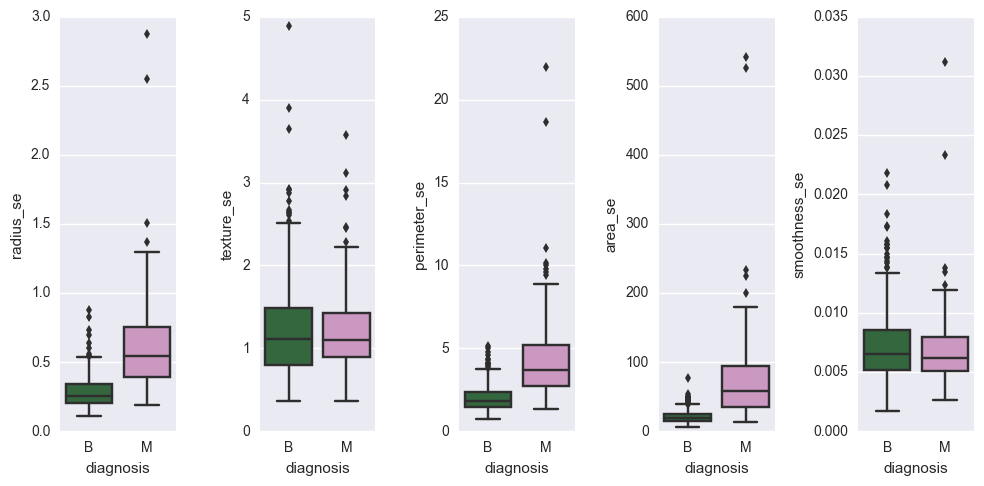

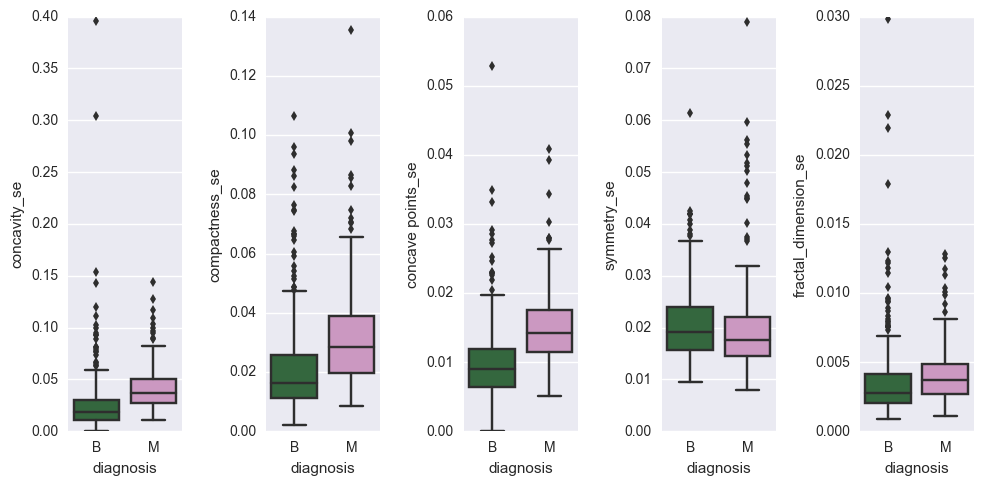

In [6]:
#%%
plt.rcParams['figure.figsize']=(10,5)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='radius_se',data=df, ax=ax1, palette='cubehelix')
s.boxplot('diagnosis',y='texture_se',data=df, ax=ax2, palette='cubehelix')
s.boxplot('diagnosis',y='perimeter_se',data=df, ax=ax3, palette='cubehelix')
s.boxplot('diagnosis',y='area_se',data=df, ax=ax4, palette='cubehelix')
s.boxplot('diagnosis',y='smoothness_se',data=df, ax=ax5, palette='cubehelix')
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='compactness_se',data=df, ax=ax2, palette='cubehelix')
s.boxplot('diagnosis',y='concavity_se',data=df, ax=ax1, palette='cubehelix')
s.boxplot('diagnosis',y='concave points_se',data=df, ax=ax3, palette='cubehelix')
s.boxplot('diagnosis',y='symmetry_se',data=df, ax=ax4, palette='cubehelix')
s.boxplot('diagnosis',y='fractal_dimension_se',data=df, ax=ax5, palette='cubehelix')    
f.tight_layout()

<h4> Worst versions of the 10 Core Predictors </h4><br>
Finally we look at the <i> Worst</i> set of features for the 10 core metrics.  Interestingly, these features show more similar vector distribution to the <i>Mean</i> columns than do the <i>Standard Error</i> columns; however, they are ranked lower in feature importance than the <i>Standard Error</i> predictors.  

A visual inspection shows that the average values of the vectors shows a similar tendency for higher average values for diagnosis == M vs. diagnosis == B.  Given this similarity in distribution to the most important <i>Mean</i> features, and taking into account the low importance ranking even compared to <i>SE</i> features, we decide to include all available predictors to achieve an improved accuracy that may capture dynamics previously unaccounted for by the classifier's ranking of the predictors' importances (Feature Importances cell[9]&[10] below).

<i><b>Of note:</b></i> Note that the <b>Fractal Dimension</b> core metric only shows a similar dynamic of higher avg. value for M vs. B when looking at the <b>Fractal Dimension Worst </b> feature values.  

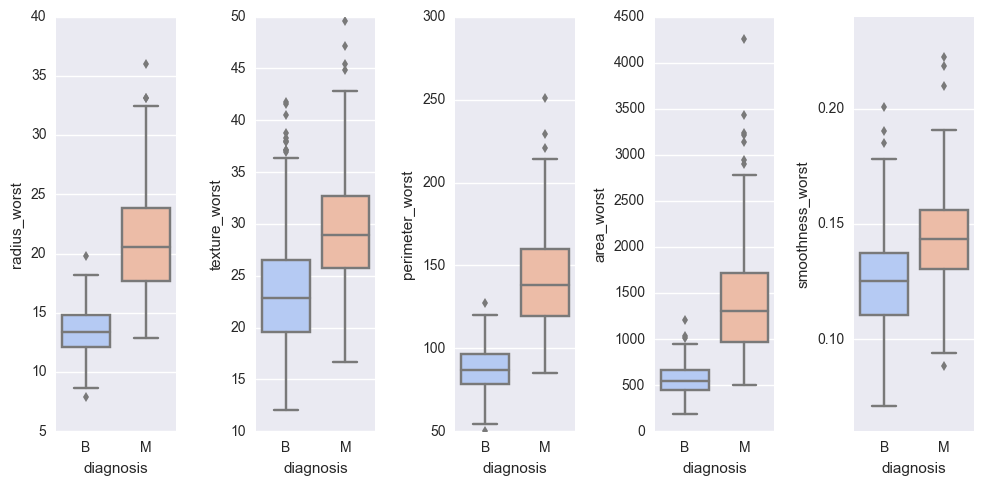

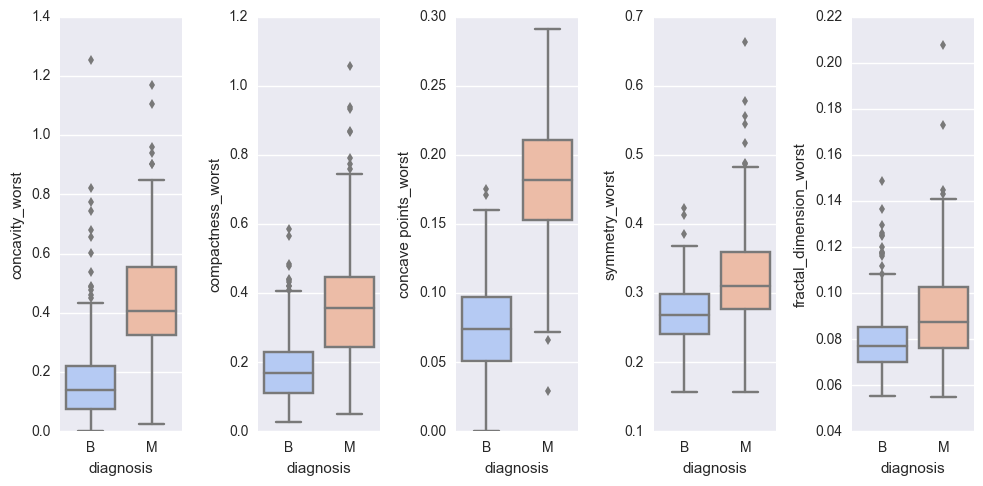

In [7]:
plt.rcParams['figure.figsize']=(10,5)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='radius_worst',data=df, ax=ax1, palette='coolwarm')
s.boxplot('diagnosis',y='texture_worst',data=df, ax=ax2, palette='coolwarm')
s.boxplot('diagnosis',y='perimeter_worst',data=df, ax=ax3, palette='coolwarm')
s.boxplot('diagnosis',y='area_worst',data=df, ax=ax4, palette='coolwarm')
s.boxplot('diagnosis',y='smoothness_worst',data=df, ax=ax5, palette='coolwarm')
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('diagnosis',y='compactness_worst',data=df, ax=ax2, palette='coolwarm')
s.boxplot('diagnosis',y='concavity_worst',data=df, ax=ax1, palette='coolwarm')
s.boxplot('diagnosis',y='concave points_worst',data=df, ax=ax3, palette='coolwarm')
s.boxplot('diagnosis',y='symmetry_worst',data=df, ax=ax4, palette='coolwarm')
s.boxplot('diagnosis',y='fractal_dimension_worst',data=df, ax=ax5, palette='coolwarm')    
f.tight_layout()

<hr>
<center><h3><i> Fitting a Random Forest Classifier </i></h3></center>

Below, we fit a RandomForestClassifier() with 1000 trees (n_estimators=1000) and then cross-validate using sklearn's native `cross_val_score()` function.

Here we are looking at all predictors, that is 3 versions of the 10 core predictors totaling 30 features. 

In [11]:
#--------------------------------------------------------------------------------------#
# Train Random Forest
np.random.seed(10)

traindf, testdf = train_test_split(df, test_size = 0.3)

x_train = traindf[x]
y_train = traindf[y]

x_test = testdf[x]
y_test = testdf[y]

forest = RandomForestClassifier(n_estimators=1000)
fit = forest.fit(x_train, y_train)
accuracy = fit.score(x_test, y_test)
predict = fit.predict(x_test)
cmatrix = confusion_matrix(y_test, predict)

#--------------------------------------------------------------------------------------#
# Perform k fold cross-validation


print ('Accuracy of Random Forest: %s' % "{0:.2%}".format(accuracy))

# Cross_Validation
v = cross_val_score(fit, x_train, y_train, cv=10)
for i in range(10):
    print('Cross Validation Score: %s'%'{0:.2%}'.format(v[i,]))

Accuracy of Random Forest: 98.25%
Cross Validation Score: 97.56%
Cross Validation Score: 97.56%
Cross Validation Score: 97.56%
Cross Validation Score: 97.50%
Cross Validation Score: 92.50%
Cross Validation Score: 92.31%
Cross Validation Score: 97.44%
Cross Validation Score: 100.00%
Cross Validation Score: 92.31%
Cross Validation Score: 92.31%


A visualization of the confusion matrix below reveals the <b>1.75% error</b> is the result of our model misclassifying 3 cases as Malignant when they were actually Benign.  

We see; however, that our classification accuracy for a mass being Benign when it is actually Benign is a perfect 100%.  However, the cross-validation performed above reveals a higher expected out-of-sample error (~4.2%) so we expect that further tests of this model on fresh data will likely be accompanied by either some misclassifications of Benign cases as well as Malignant, or greater increase in false positives where Benign cases are classified as Malignant.  

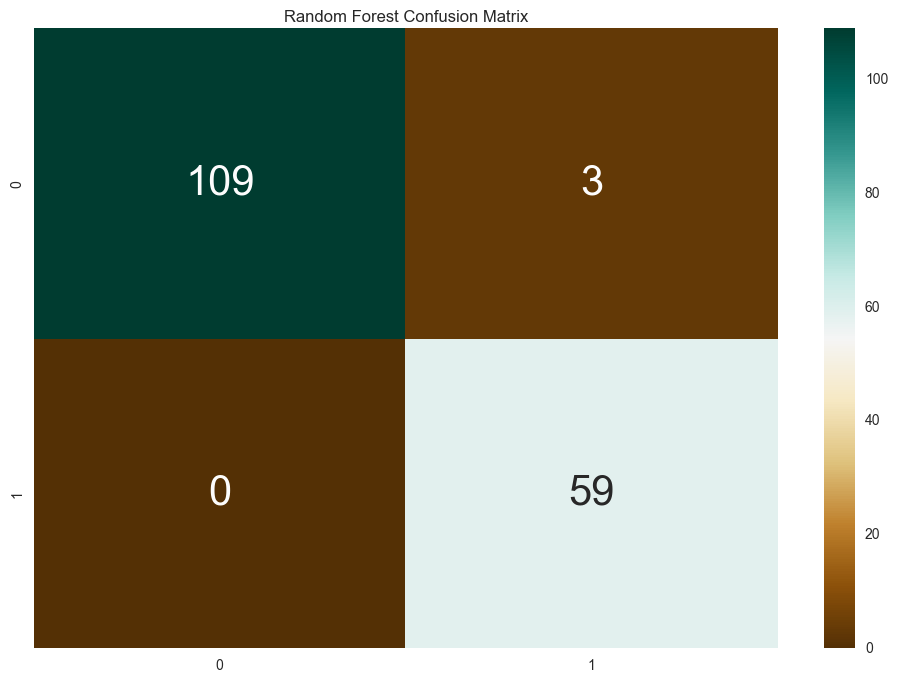

In [17]:
ax = plt.axes()
s.heatmap(cmatrix, annot=True, fmt='d', ax=ax, cmap='BrBG', annot_kws={"size": 30})
ax.set_title('Random Forest Confusion Matrix')

In [9]:
#%%Feature importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(traindf[x].shape[1]):
    print("feature %s (%f)" % (list(traindf[x])[f], importances[indices[f]]))



Feature ranking:
feature radius_mean (0.135972)
feature texture_mean (0.132478)
feature perimeter_mean (0.109587)
feature area_mean (0.101331)
feature smoothness_mean (0.091597)
feature compactness_mean (0.053240)
feature concavity_mean (0.051952)
feature concave points_mean (0.047640)
feature symmetry_mean (0.042614)
feature fractal_dimension_mean (0.033695)
feature radius_se (0.032683)
feature texture_se (0.019598)
feature perimeter_se (0.016276)
feature area_se (0.014468)
feature smoothness_se (0.012798)
feature compactness_se (0.012565)
feature concavity_se (0.012159)
feature concave points_se (0.010569)
feature symmetry_se (0.009914)
feature fractal_dimension_se (0.007275)
feature radius_worst (0.006742)
feature texture_worst (0.006160)
feature perimeter_worst (0.005654)
feature area_worst (0.005295)
feature smoothness_worst (0.005138)
feature compactness_worst (0.004974)
feature concavity_worst (0.004879)
feature concave points_worst (0.004764)
feature symmetry_worst (0.004019)
f

Gini Importances of our predictors sorted descending as derived from our Random Forest model.  

Despite the high importance of ‘Mean’ features, we forego eliminating features based on low importance (according to RF classifier) and/or potential multi-collinearity.  Feature optimization is covered in prior research, and our goal is to test accuracy using all features.

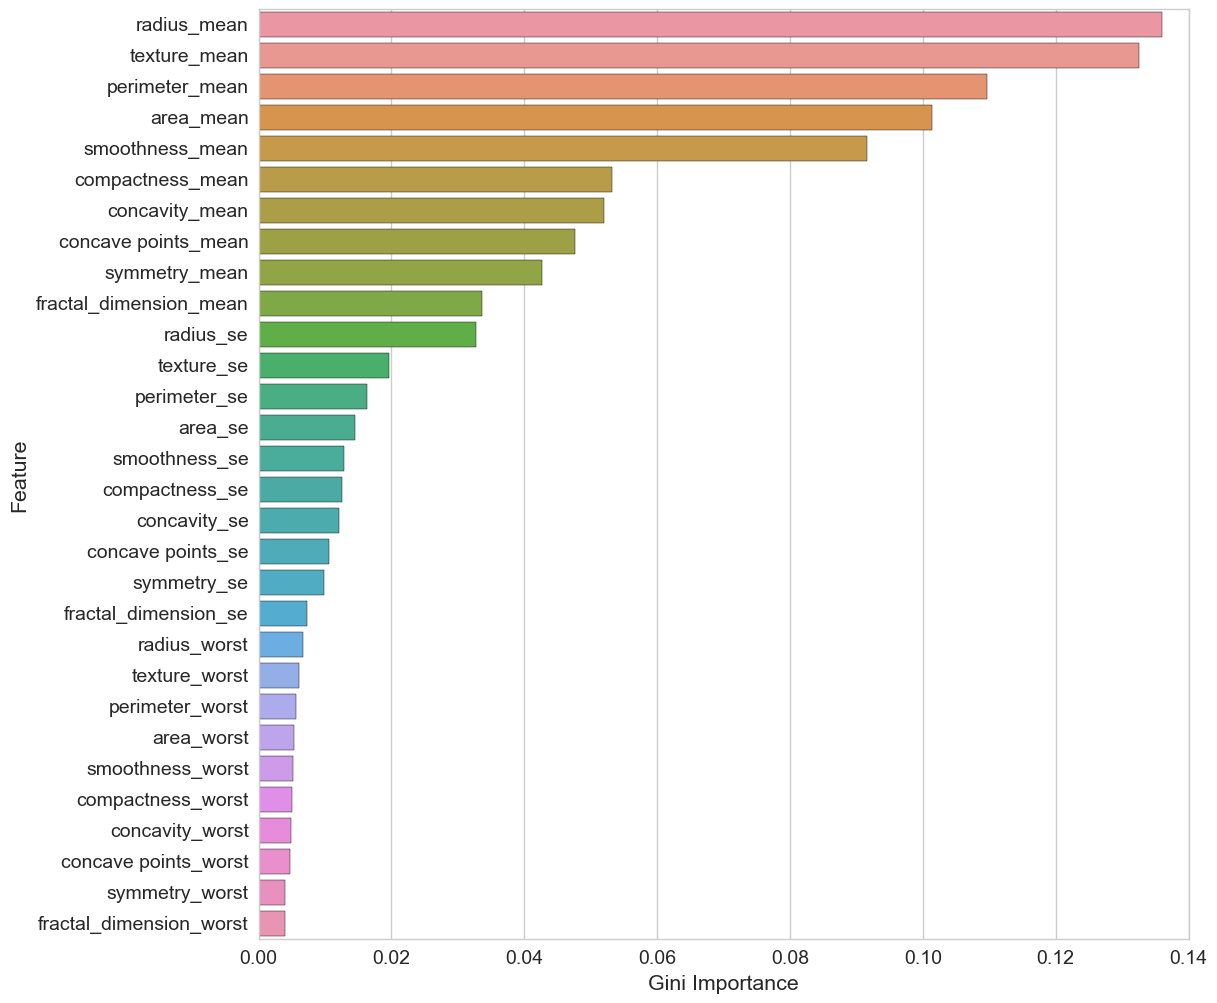

In [10]:
feat_imp = pd.DataFrame({'Feature':list(traindf[x]),
                        'Gini importance':importances[indices]})
plt.rcParams['figure.figsize']=(12,12)
s.set_style('whitegrid')
ax = s.barplot(x='Gini importance', y='Feature', data=feat_imp)
ax.set(xlabel='Gini Importance')
plt.show()

<hr>
<center><h3><i> Fitting a Support Vector Machine </i></h3></center>


In [10]:
#---------------------------------------------------------------------------------------#
# Train Support Vector Machine ---------------------------------------------------------#
#---------------------------------------------------------------------------------------#

np.random.seed(10)

traindf, testdf = train_test_split(df_norm, test_size = 0.3)

x_train = traindf[x]
y_train = traindf[y]

x_test = testdf[x]
y_test = testdf[y]

svmf = svm.SVC()
svm_fit = svmf.fit(x_train, y_train)
accuracy = svm_fit.score(x_test, y_test)
predict = svm_fit.predict(x_test)
svm_cm = confusion_matrix(y_test, predict)

#--------------------------------------------------------------------------------------#
# Perform k fold cross-validation
print ('Accuracy of Support Vector Machine: %s' % "{0:.2%}".format(accuracy))

# Cross_Validation
v = cross_val_score(svm_fit, x_train, y_train, cv=10)
for i in range(10):
    print('Cross Validation Score: %s'%'{0:2%}'.format(v[i,]))

Accuracy of Support Vector Machine: 96.49%
Cross Validation Score: 92.682927%
Cross Validation Score: 97.560976%
Cross Validation Score: 92.682927%
Cross Validation Score: 95.000000%
Cross Validation Score: 92.500000%
Cross Validation Score: 92.307692%
Cross Validation Score: 92.307692%
Cross Validation Score: 100.000000%
Cross Validation Score: 92.307692%
Cross Validation Score: 89.743590%


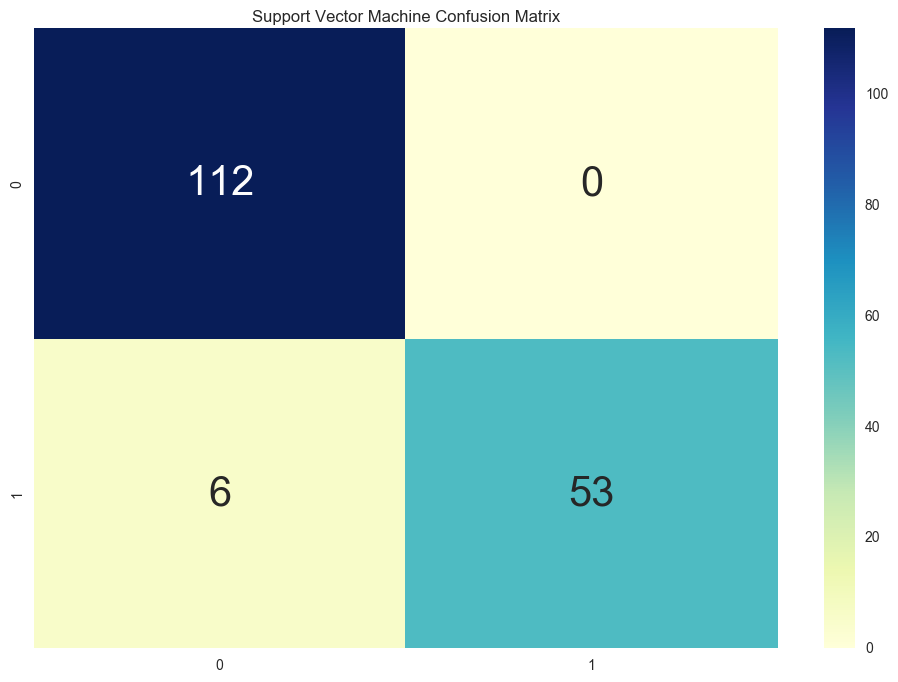

In [18]:
#   Visualize SVM Confusion Matrix
plt.rcParams['figure.figsize']=(12,8)
ax = plt.axes()
s.heatmap(svm_cm, annot=True, fmt='d', ax=ax, cmap="YlGnBu", annot_kws={"size": 30})
ax.set_title('Support Vector Machine Confusion Matrix')

<hr>
<center><h3><i> Fitting a Multilayer Perceptron Classifier </i></h3></center>


In [12]:

#---------------------------------------------------------------------------------------#
# Train MLPClassifier ------------------------------------------------------------------#
#---------------------------------------------------------------------------------------#
np.random.seed(10)

traindf, testdf = train_test_split(df_norm, test_size = 0.3)

x_train = traindf[x]
y_train = traindf[y]

x_test = testdf[x]
y_test = testdf[y]

clf = MLPClassifier(solver='lbfgs', alpha=5, hidden_layer_sizes=(500,), random_state=10)
mlp_fit = clf.fit(x_train, y_train)
accuracy = mlp_fit.score(x_test, y_test)
predict = mlp_fit.predict(x_test)
mlp_cm = confusion_matrix(y_test, predict)

#--------------------------------------------------------------------------------------#
# Perform k fold cross-validation
print ('Accuracy of Multilayer Perceptron: %s' % "{0:.2%}".format(accuracy))

# Cross_Validation
v = cross_val_score(mlp_fit, x_train, y_train, cv=10)
for i in range(10):
    print('Cross Validation Score: %s'%'{0:2%}'.format(v[i,]))


Accuracy of Multilayer Perceptron: 99.42%
Cross Validation Score: 100.000000%
Cross Validation Score: 95.121951%
Cross Validation Score: 97.560976%
Cross Validation Score: 97.500000%
Cross Validation Score: 95.000000%
Cross Validation Score: 94.871795%
Cross Validation Score: 92.307692%
Cross Validation Score: 100.000000%
Cross Validation Score: 94.871795%
Cross Validation Score: 94.871795%


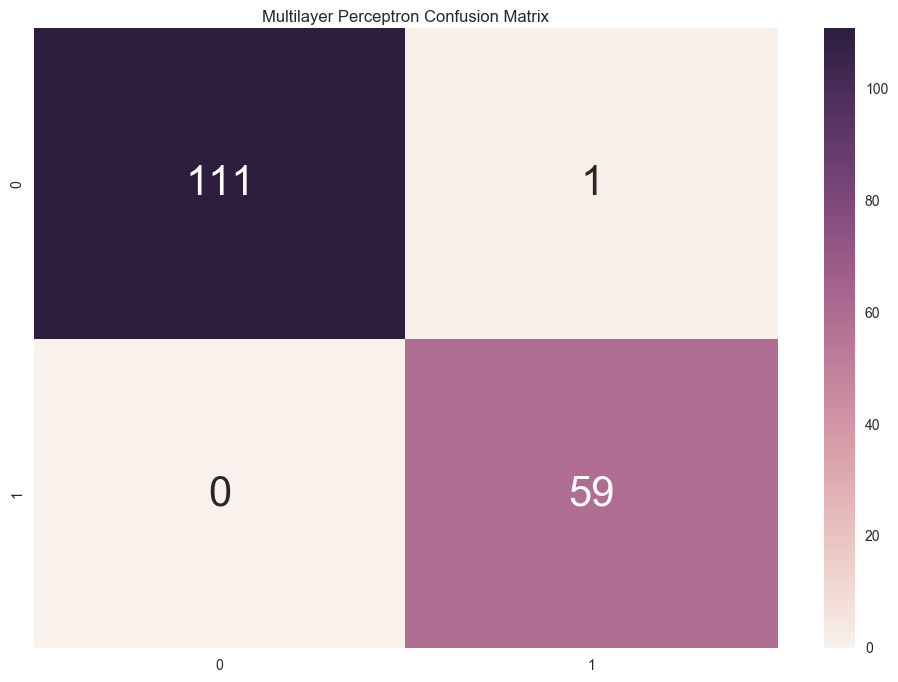

In [19]:
#   Visualize MLP Confusion Matrix
plt.rcParams['figure.figsize']=(12,8)
ax = plt.axes()
s.heatmap(mlp_cm, annot=True, fmt='d', ax=ax, annot_kws={"size": 30})
ax.set_title('Multilayer Perceptron Confusion Matrix')


<h4><i>Conclusions and Remarks for Future Research:</i></h4>

In spite of the higher importance of <i>Mean</i> category features, we find a high accuracy and cross-validation score by including all available predictor versions in our model <b>(<i>Mean, Standard Error, and Worst</i>)</b> for the 10 core predictors (<b>Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Concave Points, Symmetry, and Fractal Dimension</b>).  

While our <b>Multilayer Perceptron Classifier</b> has the highest accuracy of <b>99.42%</b>, our study, uses a very small dataset of only 569 observations that need to be used for both the training and test dataframes. Further adjustments may likely be necessary with increased data size. In addition, we may be able to improve accuracy incrementally by further paramater optimization (i.e. testing many different levels of Alpha penalty in the MLPClassifier).

It would also be of use to understand how our SVM classifier achieves 100% accuracy for predicting Malignant data records while having a higher error for Benign classifications alone than our Random Forest and Multilayer Perceptron classifiers which have a 100% accuracy on predicting Benign records, but show error in predicting Malignant.

Furthermore, detail on the additional measurements that can be acquired by the FNA (Fine Needle Aspirate) technique on breast cancer mass nuclei should be explored.

<hr>
<h4><i><u>Appendix:</u></i></h4>

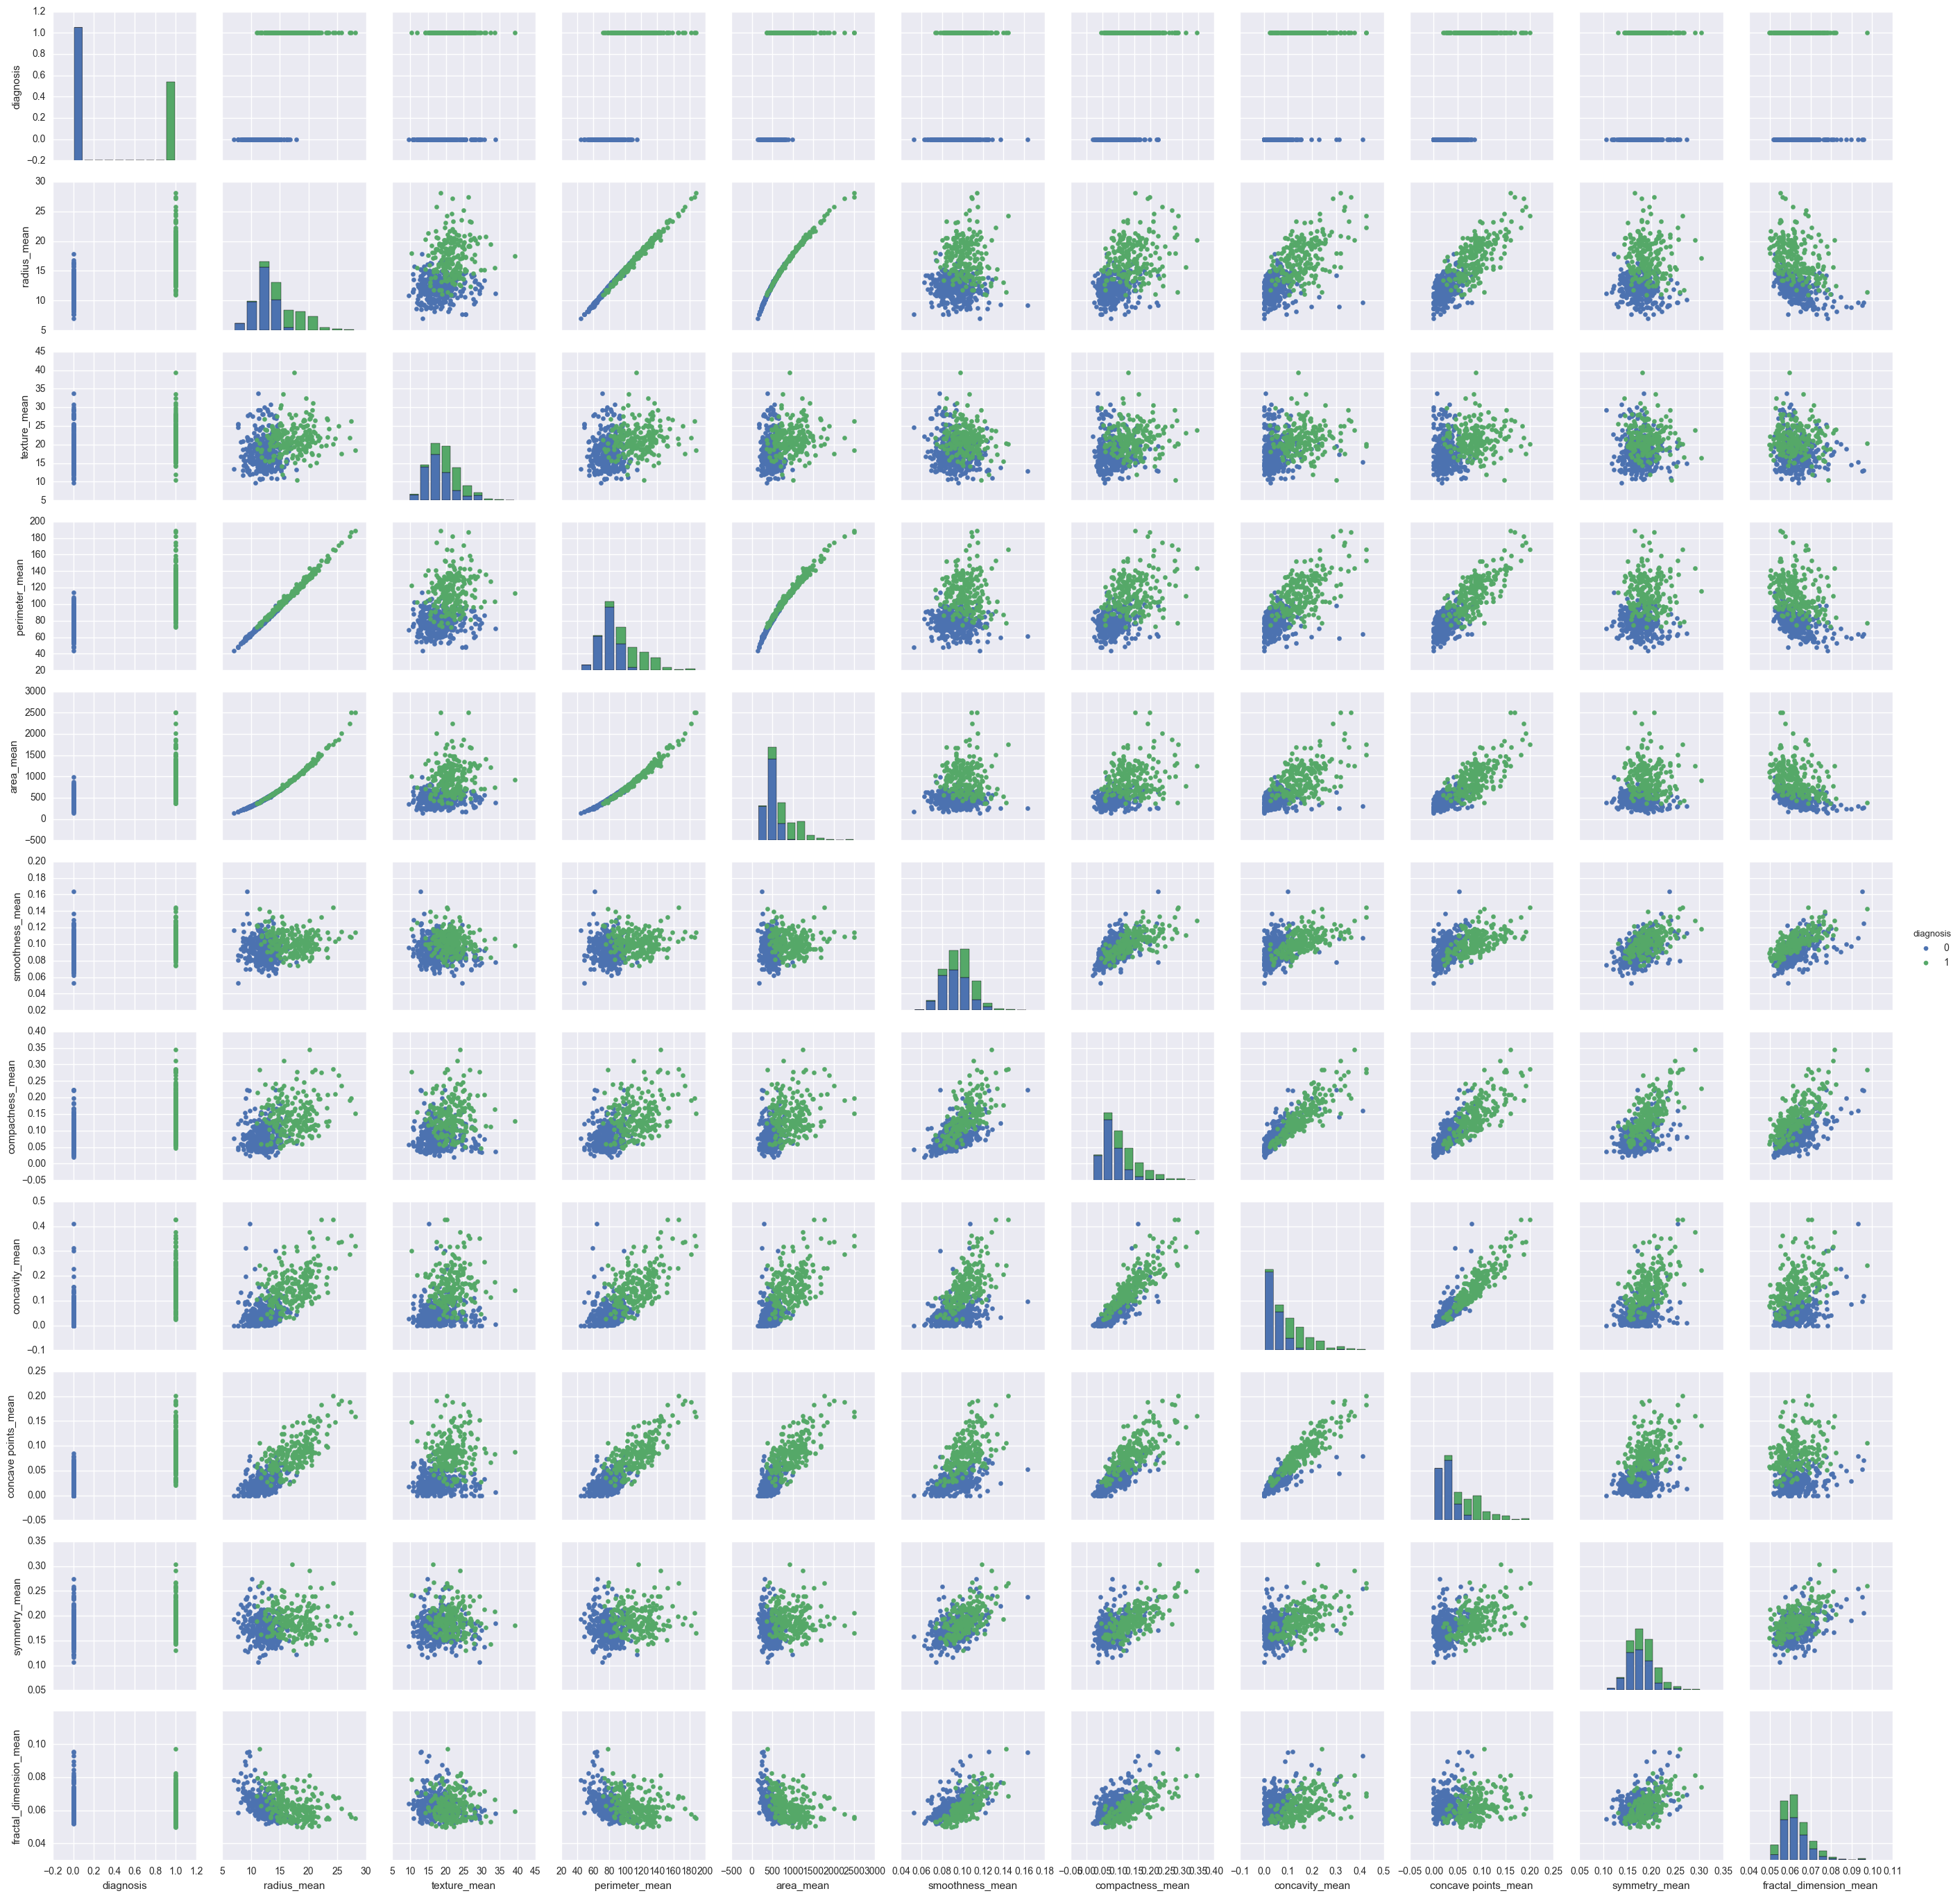

In [22]:
diagnosis = df['diagnosis']
mean_cols = [col for col in df.columns if 'mean' in col]
meandf = pd.concat([diagnosis,df[mean_cols]], axis=1)


g = s.PairGrid(meandf, hue="diagnosis")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
